## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../data/archive/AviationData.csv", encoding='cp1252', low_memory=False)
# US_State_Codes = pd.read_csv('../data/archive/USState_Codes.csv', encoding='cp1252', low_memory=False)

## Data Cleaning

In [3]:
# Data Cleaning 
df.columns = df.columns.str.replace('.', ' ', regex=True)
df.columns = df.columns.str.title()
# dropping rows that are non-Airplane related
df = df[(df['Aircraft Category'] == 'Airplane')]
# dropping rows that are Amateur-Built aircraft
df = df[(df['Amateur Built'] == 'No')]
# capitalizing all Make strings to avoid double categories
df['Make'] = df['Make'].str.title() 
# capitalizing all Air Carrier strings to avoid double categories
df['Air Carrier'] = df['Air Carrier'].str.title() 
# capitalizing all Air Carrier strings to avoid double categories
df['Weather Condition'] = df['Weather Condition'].str.upper() 
# dropping unimportant columns, mostly ID numbers
df.drop(axis=1, inplace=True, labels=['Aircraft Category', 'Airport Code', 'Publication Date', 'Weather Condition',
                                      'Airport Name', 'Amateur Built', 'Event Id', 'Accident Number', 'Registration Number', 
                                      'Schedule', 'Broad Phase Of Flight', 'Latitude', 'Longitude', 'Air Carrier',
                                     'Report Status'])
# reconciling different index names under Far Description
df['Far Description'].replace(to_replace= '121', value='Part 121', inplace=True)
df['Far Description'].replace(to_replace= '135', value='Part 135', inplace=True)
df['Far Description'].replace(to_replace= '137', value='Part 137', inplace=True)
df['Far Description'].replace(to_replace= '129', value='Part 129', inplace=True)
df['Far Description'].replace(to_replace= 'Part 137', value='Part 137: Agricultural', inplace=True)
df['Far Description'].replace(to_replace= 'Part 135', value='Part 135: Air Taxi & Commuter', inplace=True)
df['Far Description'].replace(to_replace= 'Part 121', value='Part 121: Air Carrier', inplace=True)
df['Far Description'].replace(to_replace= 'Part 129', value='Part 129: Foreign', inplace=True)
df['Far Description'].replace(to_replace= 'Part 129', value='Part 129: Foreign', inplace=True)
df['Far Description'].replace(to_replace= 'NUSN', value='Non-U.S., Non-Commercial', inplace=True)
df['Far Description'].replace(to_replace= 'NUSC', value='Non-U.S., Commercial', inplace=True)
df['Far Description'].replace(to_replace= '091', value='Part 91: General Aviation', inplace=True)
df['Far Description'].replace(to_replace= '125', value='Part 125: 20+ Pax,6000+ lbs', inplace=True)
df['Far Description'].replace(to_replace= 'UNK', value='Unknown', inplace=True)
# dropping rows from far description that are not relevant
df = df[(df['Far Description']=='Part 91: General Aviation') | (df['Far Description']=='Non-U.S., Commercial') |
  (df['Far Description']=='Part 121: Air Carrier') | (df['Far Description']=='Part 129: Foreign') |
  (df['Far Description']=='Unknown')]
# cutting off events that occured before 1990
df = df[(df['Event Date'] > '1990-00-00')]

df.head()

,Investigation Type,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Number Of Engines,Engine Type,Far Description,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
24818,Accident,1990-01-28,"ROXBURY, ME",United States,Non-Fatal,Destroyed,Taylorcraft,BC12D,1.0,Unknown,Part 91: General Aviation,Personal,NaN,NaN,NaN,2.0
24820,Accident,1990-01-28,"PITTSTOWN, NJ",United States,Non-Fatal,Substantial,Globe,SWIFT GCIB,1.0,Reciprocating,Part 91: General Aviation,Personal,NaN,NaN,NaN,1.0
24841,Accident,1990-02-01,"FAIRFIELD, CT",United States,Fatal(1),Destroyed,Piper,PA-28-181,1.0,Reciprocating,Part 91: General Aviation,Personal,1.0,NaN,NaN,NaN
25079,Accident,1990-03-16,"SULATNA CROSS, AK",United States,Non-Fatal,Substantial,Cessna,170B,1.0,Reciprocating,Part 91: General Aviation,Personal,NaN,NaN,NaN,2.0
25228,Accident,1990-04-09,"GADSDEN, AL",United States,Fatal(2),Destroyed,Cessna,172,1.0,Reciprocating,Part 91: General Aviation,Unknown,2.0,NaN,NaN,7.0


In [4]:
# df.info()

In [5]:
# df[(df['Air Carrier'].isna())]['Make'].value_counts()

In [6]:
# df[(df['Air Carrier'].isna()==False)]['Make'].value_counts()

In [7]:
# df[(df['Air Carrier'].isna())]['Make'].value_counts()

In [8]:
# df['Make'].value_counts() 

In [9]:
# df['Model'].value_counts()

In [10]:
# df['Number Of Engines'].value_counts() 
# possible correlation with aircraft damage/injury

In [11]:
# df['Far Description'].value_counts()


In [12]:
# df['Schedule'].value_counts()

# only three values Scheduled, Unscheduled, Unknown
# replace strings for more clarity

In [13]:
# df['Purpose Of Flight'].value_counts()
# get rid of aerial applications and most of the other categories

In [14]:
# df['Air Carrier'].value_counts() 
# comparison with frequency of accidents

In [15]:
# df['Broad Phase Of Flight'].value_counts()


In [16]:
# df['Report Status'].value_counts()

## Creating df_injuries dataframe

In [17]:
df_injuries = df[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].fillna(0)

# calculating severity ratio using injured divided by total people on 
severity = df_injuries['Total Fatal Injuries']*5 + df_injuries['Total Serious Injuries']*2.5 + df_injuries['Total Minor Injuries'] - df_injuries['Total Uninjured']

# adding severity ratio series into df_injuries dataframe
df_injuries['Severity Ratio'] = (severity)
df_injuries.reset_index(inplace=True, drop=True)

# adding model and make series into df_injuries dataframe
Make = pd.Series(name = 'Make', data = df['Make']).reset_index(drop=True)
Model_And_Make = pd.Series(name = 'Model & Make', data = (df['Make'] + ': ' + df['Model'])).reset_index(drop=True)
df_injuries['Model And Make'] = Model_And_Make
df_injuries['Make'] = Make
df_injuries.dropna(subset=['Model And Make'], inplace=True)

df_injuries

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Severity Ratio,Model And Make,Make
0,0.0,0.0,0.0,2.0,-2.0,Taylorcraft: BC12D,Taylorcraft
1,0.0,0.0,0.0,1.0,-1.0,Globe: SWIFT GCIB,Globe
2,1.0,0.0,0.0,0.0,5.0,Piper: PA-28-181,Piper
3,0.0,0.0,0.0,2.0,-2.0,Cessna: 170B,Cessna
4,2.0,0.0,0.0,7.0,3.0,Cessna: 172,Cessna
...,...,...,...,...,...,...,...
18041,0.0,0.0,0.0,1.0,-1.0,Cessna: 172,Cessna
18042,0.0,0.0,0.0,1.0,-1.0,Piper: PA42,Piper
18043,0.0,0.0,0.0,1.0,-1.0,Cirrus Design Corp: SR22,Cirrus Design Corp
18044,0.0,1.0,0.0,0.0,2.5,Cessna: R172K,Cessna


In [18]:
df_injuries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18033 entries, 0 to 18045
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total Fatal Injuries    18033 non-null  float64
 1   Total Serious Injuries  18033 non-null  float64
 2   Total Minor Injuries    18033 non-null  float64
 3   Total Uninjured         18033 non-null  float64
 4   Severity Ratio          18033 non-null  float64
 5   Model And Make          18033 non-null  object 
 6   Make                    18033 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.1+ MB


In [19]:
top_50_makenmodel = list(df_injuries['Model And Make'].value_counts()[:50].index)

In [20]:
top_60_makes = list(df_injuries['Make'].value_counts()[:60].index)

In [21]:
# df_injuries = df_injuries[(df_injuries['Model And Make'].isin(top_50_planes))]

In [22]:
df_injuries = df_injuries[(df_injuries['Make'].isin(top_60_makes))]
df_injuries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15940 entries, 0 to 18045
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total Fatal Injuries    15940 non-null  float64
 1   Total Serious Injuries  15940 non-null  float64
 2   Total Minor Injuries    15940 non-null  float64
 3   Total Uninjured         15940 non-null  float64
 4   Severity Ratio          15940 non-null  float64
 5   Model And Make          15940 non-null  object 
 6   Make                    15940 non-null  object 
dtypes: float64(5), object(2)
memory usage: 996.2+ KB


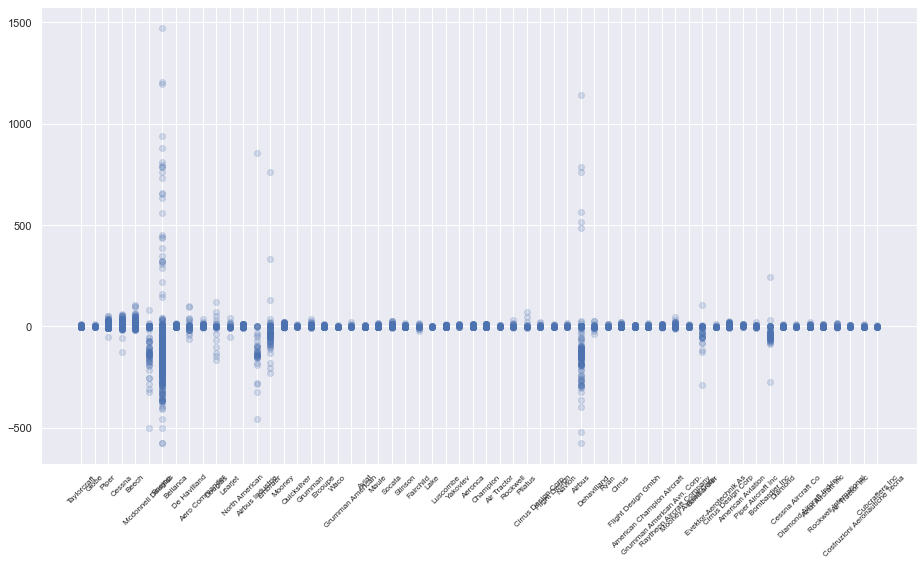

In [23]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(13,8))
ax.scatter(x='Make', y='Severity Ratio', alpha=0.2, data= df_injuries)
ax.tick_params(axis='x', labelsize=8, labelrotation=45)
plt.tight_layout()

In [24]:
# clean up double values
df_injuries['Make'].replace(to_replace= 'Cirrus Design Corp', value='Cirrus', inplace=True)
df_injuries['Make'].replace(to_replace= 'Cirrus Design Corp.', value='Cirrus', inplace=True)
df_injuries['Make'].replace(to_replace= 'Cessna Aircraft Co', value='Cessna', inplace=True)
df_injuries['Make'].replace(to_replace= 'Aviat Aircraft Inc', value='Aviat', inplace=True)
df_injuries['Make'].replace(to_replace= 'Diamond Aircraft Ind Inc', value='Diamond', inplace=True)
df_injuries['Make'].replace(to_replace= 'Piper Aircraft Inc', value='Piper', inplace=True)
df_injuries['Make'].replace(to_replace= 'American Champion Aircraft', value='American Champion', inplace=True)
df_injuries['Make'].replace(to_replace= 'Champion', value='American Champion', inplace=True)
df_injuries['Make'].replace(to_replace= 'Grumman American Avn. Corp.', value='Grumman', inplace=True)
df_injuries['Make'].replace(to_replace= 'Bombardier Inc', value='Bombardier', inplace=True)
df_injuries['Make'].replace(to_replace= 'Airbus Industrie', value='Airbus', inplace=True)
df_injuries['Make'].replace(to_replace= 'Rockwell International', value='Rockwell', inplace=True)
df_injuries['Make'].replace(to_replace= 'Mooney Aircraft Corp.', value='Mooney', inplace=True)
df_injuries['Make'].replace(to_replace= 'Dehavilland', value='De Havilland', inplace=True)
df_injuries['Make'].replace(to_replace= 'Flight Design Gmbh', value='Flight Design', inplace=True)
df_injuries['Make'].replace(to_replace= 'Air Tractor', value='Air Tractor Inc', inplace=True)
df_injuries['Make'].replace(to_replace= 'Evektor-Aerotechnik As', value='Evektor-Aerotechnik', inplace=True)
df_injuries['Make'].replace(to_replace= 'Costruzioni Aeronautiche Tecna', value='Tecnam Costruzioni', inplace=True)

/Users/jf/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


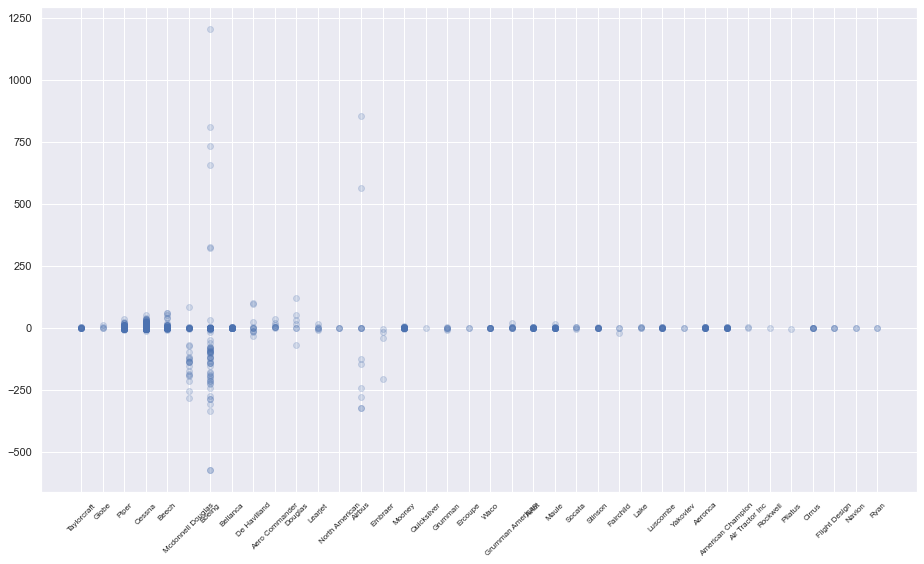

In [25]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(13,8))
ax.scatter(x='Make', y='Severity Ratio', alpha=0.2, data= df_injuries[:1500])
ax.tick_params(axis='x', labelsize=8, labelrotation=45)
plt.tight_layout()

In [26]:
#groupby average
avg_sev_ratio_make = df_injuries.groupby('Make').mean(numeric_only=True)['Severity Ratio']
avg_sev_ratio_make_index = list(avg_sev_ratio_make.index)
avg_sev_ratio_make_value =  list(avg_sev_ratio_make.values)

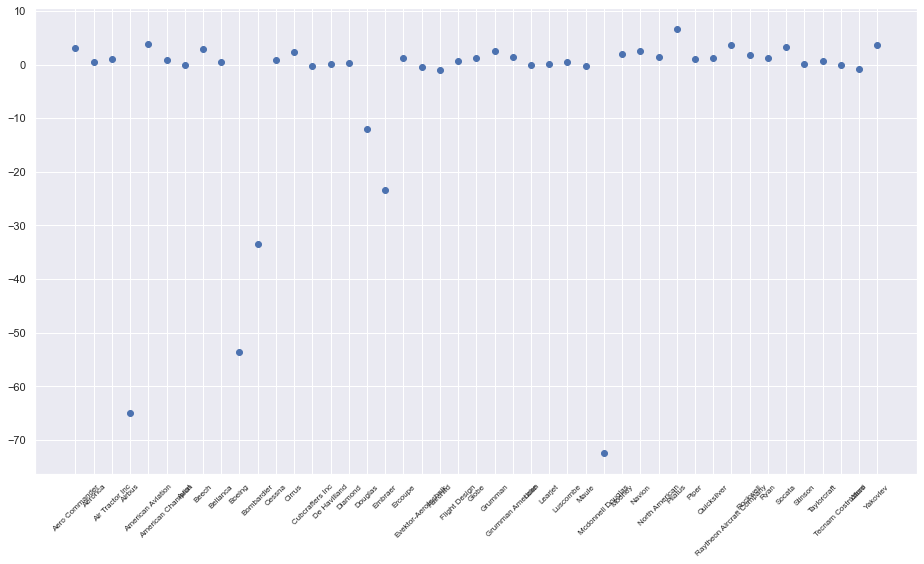

In [27]:
fig, ax = plt.subplots(figsize=(13,8))
ax.scatter(x=avg_sev_ratio_make_index, y=avg_sev_ratio_make_value, alpha=1)
ax.tick_params(axis='x', labelsize=8, labelrotation=45)
plt.tight_layout()

In [28]:
# split private and commercial aircraft based on mean severity ratio (SplitMean)

SplitMean = -10

CommercialMake = {make: mean for make, mean in dict(avg_sev_ratio_make).items() if mean < SplitMean}
PrivateMake = {make: mean for make, mean in dict(avg_sev_ratio_make).items() if mean > SplitMean}
CommercialList = [make for make, mean in dict(avg_sev_ratio_make).items() if mean < SplitMean]
PrivateList = [make for make, mean in dict(avg_sev_ratio_make).items() if mean > SplitMean]
CommercialMake = pd.Series(CommercialMake, name = 'Commercial Make')
PrivateMake = pd.Series(PrivateMake, name = 'Private Make')

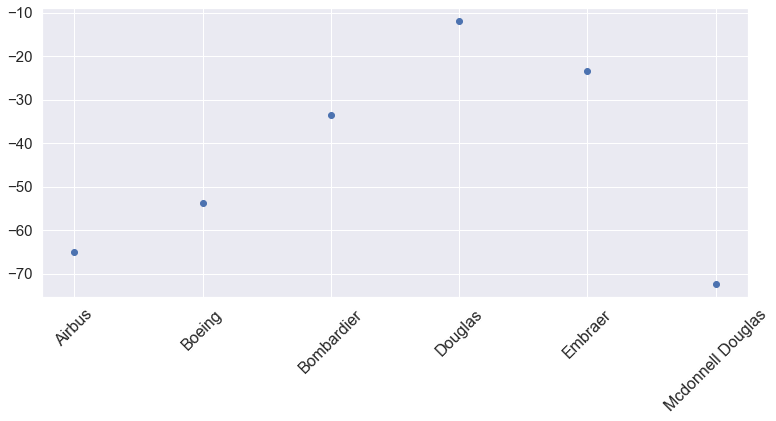

In [29]:
# plotting commercial aircraft severity means

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x=list(CommercialMake.index), y=list(CommercialMake.values), alpha=1)
ax.tick_params(axis='x', labelsize=16, labelrotation=45)
ax.tick_params(axis='y', labelsize=15)
plt.tight_layout()

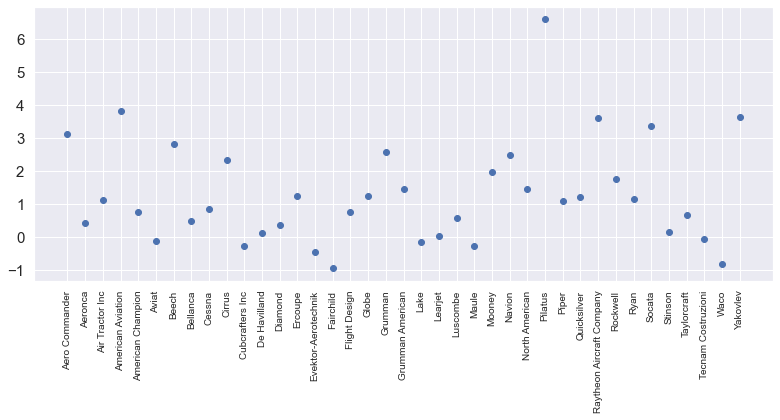

In [47]:
# plotting private aircraft severity means

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x=list(PrivateMake.index), y=list(PrivateMake.values), alpha=1)
ax.tick_params(axis='x', labelsize=10, labelrotation=90)
ax.tick_params(axis='y', labelsize=15)
plt.tight_layout()

In [31]:
df_Commercial = df_injuries[(df_injuries['Make'].isin(CommercialList))][['Severity Ratio', 'Model And Make', 'Make']].reset_index(drop=True)
CommercialSeverityRatios = list(df_Commercial['Severity Ratio'].values)
CommercialMakes = list(df_Commercial['Make'].values)

df_Private = df_injuries[(df_injuries['Make'].isin(PrivateList))][['Severity Ratio', 'Model And Make', 'Make']].reset_index(drop=True)
PrivateSeverityRatios = list(df_Private['Severity Ratio'].values)
PrivateMakes = list(df_Private['Make'].values)


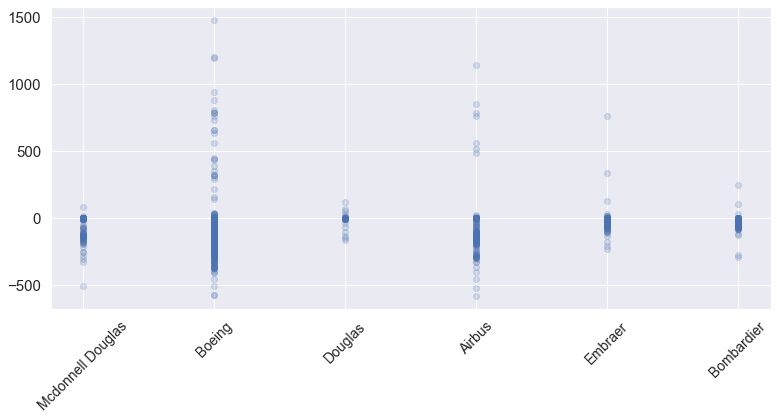

In [32]:
fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x=CommercialMakes, y=CommercialSeverityRatios, alpha=0.2)
ax.tick_params(axis='x', labelsize=14, labelrotation=45)
ax.tick_params(axis='y', labelsize=15)
plt.tight_layout()


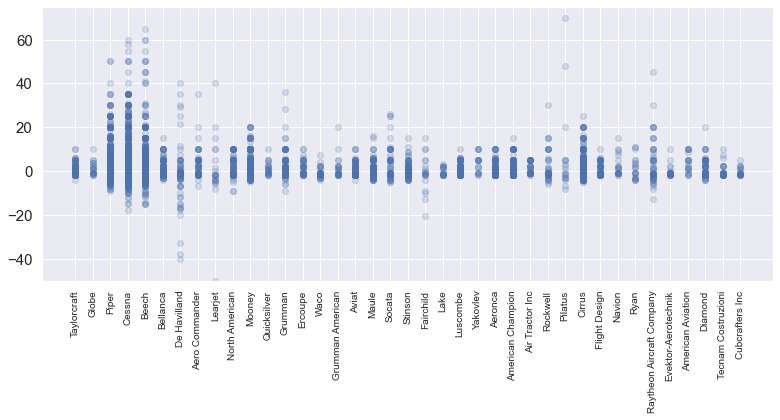

In [48]:
fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x=PrivateMakes, y=PrivateSeverityRatios, alpha=0.2)
ax.tick_params(axis='x', labelsize=10, labelrotation=90)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylim(bottom=-50, top=75)
plt.tight_layout()

In [34]:
# Narrowing down best craft for Airbus

df_Airbus = df_Commercial[(df_Commercial['Make'].isin(['Airbus']))].reset_index(drop=True)
df_Airbus['Model And Make'].replace(to_replace= 'Airbus Industrie:', value='Airbus:', inplace=True, regex=True)
df_Airbus['Model And Make'].replace(to_replace= 'Airbus: ', value='', inplace=True, regex=True)
df_Airbus['Model And Make'].replace(to_replace= ' ', value='', inplace=True, regex=True)
df_Airbus['Model And Make'].replace(to_replace= 'A', value='', inplace=True, regex=True)
df_Airbus['Model And Make'].replace(to_replace= '-', value='', inplace=True, regex=True)
df_Airbus['Model And Make'] = df_Airbus['Model And Make'].str[:3]


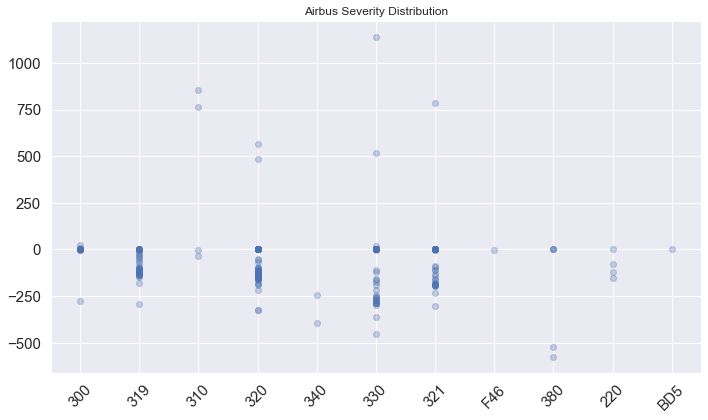

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x='Model And Make', y='Severity Ratio', data= df_Airbus, alpha=0.3)
ax.tick_params(axis='x', labelsize=15, labelrotation=45)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('Airbus Severity Distribution')
plt.tight_layout()

In [36]:
# Narrowing down best craft for Boeing

df_Boeing = df_Commercial[(df_Commercial['Make'].isin(['Boeing']))].reset_index(drop=True)
df_Boeing['Model And Make'].replace(to_replace= 'Boeing:', value='', inplace=True, regex=True)
df_Boeing['Model And Make'].replace(to_replace= ' ', value='', inplace=True, regex=True)
df_Boeing['Model And Make'].replace(to_replace= '-', value='', inplace=True, regex=True)
df_Boeing['Model And Make'].replace(to_replace= 'B', value='', inplace=True, regex=True)
df_Boeing['Model And Make'].value_counts()[:50]
df_Boeing['Model And Make'] = df_Boeing['Model And Make'].str[:3]


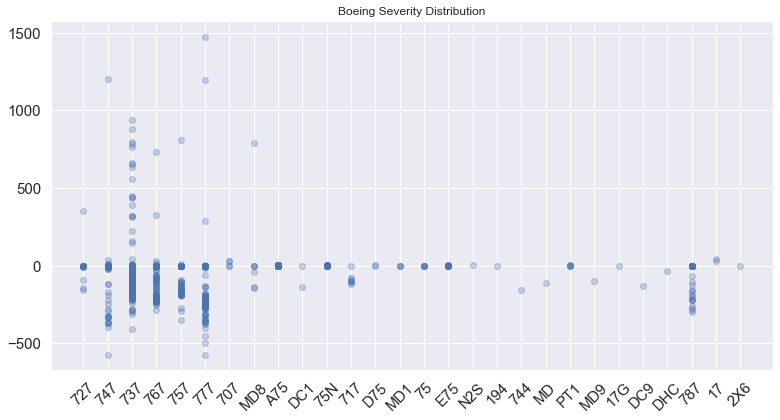

In [37]:
fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x='Model And Make', y='Severity Ratio', data= df_Boeing, alpha=0.3)
ax.tick_params(axis='x', labelsize=15, labelrotation=45)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('Boeing Severity Distribution')
plt.tight_layout()

In [38]:
# Narrowing down best craft for Cessna

df_Cessna = df_Private[(df_Private['Make'].isin(['Cessna']))].reset_index(drop=True)
df_Cessna['Model And Make'].replace(to_replace= 'Cessna: ', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= ' ', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'A', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'R', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'K', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'P', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'T', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'U', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'C', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'L', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= '-', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'S', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'E', value='', inplace=True, regex=True)
df_Cessna['Model And Make'].replace(to_replace= 'F', value='', inplace=True, regex=True)
df_Cessna['Model And Make'] = df_Cessna['Model And Make'].str[:3]


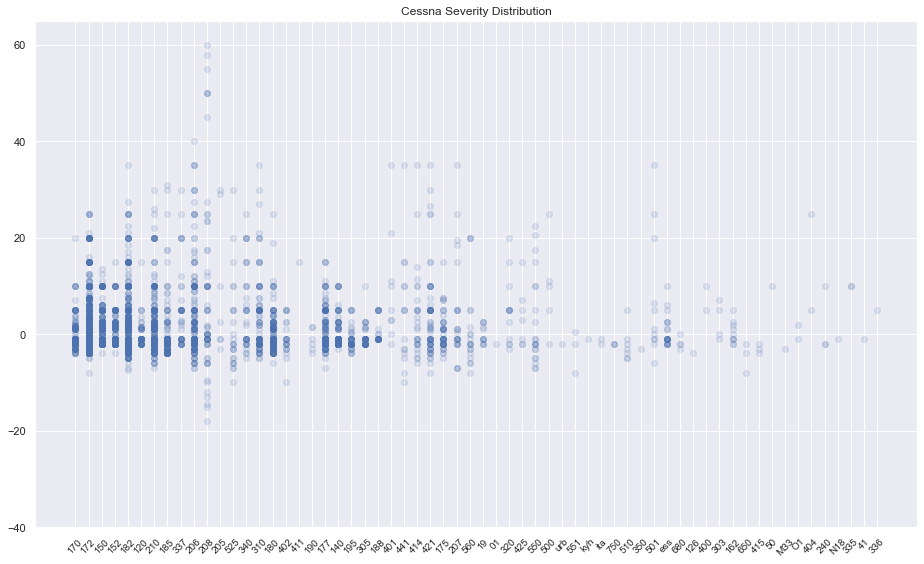

In [39]:
fig, ax = plt.subplots(figsize=(13,8))
ax.scatter(x='Model And Make', y='Severity Ratio', data= df_Cessna, alpha=0.15)
ax.tick_params(axis='x', labelsize=10, labelrotation=45)
ax.set_title('Cessna Severity Distribution')
ax.set_ylim(top=65, bottom=-40)
plt.tight_layout()
#do grouby mean then decide based off of that since its flat across the board

In [40]:
# Narrowing down best craft for De Havilland

df_DeHavilland = df_Private[(df_Private['Make'].isin(['De Havilland']))].reset_index(drop=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'De Havilland: ', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'Dehavilland: ', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= ' ', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= '-', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'BEAVER', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'Beaver', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'TIGERMOTH', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'VENOM', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'Venom', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'TwinOtter', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'TWINOTTER', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'VampireMK3', value='DH115', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'VAMPIRE', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'DHC', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'DH', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'] = df_DeHavilland['Model And Make'].str[:3]
df_DeHavilland['Model And Make'].replace(to_replace= 'MK', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'TW', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'T', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'L2', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= '/U', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'U', value='', inplace=True, regex=True)
df_DeHavilland['Model And Make'].replace(to_replace= 'A', value='', inplace=True, regex=True)


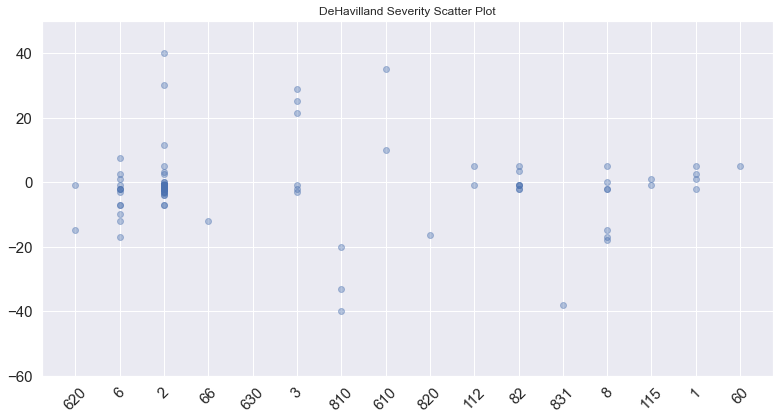

In [41]:
fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x='Model And Make', y='Severity Ratio', data= df_DeHavilland, alpha=0.4)
ax.tick_params(axis='x', labelsize=15, labelrotation=45)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('DeHavilland Severity Scatter Plot')
ax.set_ylim(top=50, bottom=-60)
plt.tight_layout()

In [50]:
Boeing_DF = df_Boeing.to_csv('Boeing_DF.csv')

In [51]:
Boeing_DF_excel = df_Boeing.to_excel('Boeing_DF.xlsx')